<a href="https://colab.research.google.com/github/pramod1997/Path-To-Data-Science/blob/master/classifying_heart_disease_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this kernel I have performed Exploratory Data Analysis on the Heart Diseases UCI and tried to identify relationship between heart disease  and various other features. After EDA data pre-processing is done I have applied k-NN(k-Nearest Neighbors) method and Logistic Regression Algorithm to make the predictions.
I will use various other algorithms for predictions in future and add them in this kernel.

In [33]:
#link to the dataset -> https://www.kaggle.com/ronitf/heart-disease-uci
#!unzip heart-disease-uci.zip
!pip install -U seaborn  ## for newer version og seaborn


Archive:  heart-disease-uci.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: heart.csv               
    100% |████████████████████████████████| 215kB 25.8MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import warnings
warnings.filterwarnings('ignore')

### **Importing required libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Loading the data**

In [3]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


The dataset contains the following features:<br>
**1. age(in years)**<br>
**2. sex:** (1 = male; 0 = female)<br>
**3. cp:** chest pain type<br>
**4. trestbps:** resting blood pressure (in mm Hg on admission to the hospital)<br>
**5. chol:** serum cholestoral in mg/dl<br>
**6. fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
**7. restecg:** resting electrocardiographic results<br>
**8. thalach:** maximum heart rate achieved<br>
**9. exang:** exercise induced angina (1 = yes; 0 = no)<br>
**10. oldpeak**: ST depression induced by exercise relative to rest<br>
**11. slope:** the slope of the peak exercise ST segment<br>
**12. ca:** number of major vessels (0-3) colored by flourosopy<br>
**13. thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
**14. target:** 1 or 0 <br>

### **Features of the data set**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Dimensions of the dataset**

In [5]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


**Checking for null values in the dataset**

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the dataset

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The features described in the above data set are:**

**1. Count** tells us the number of NoN-empty rows in a feature.<br>

**2. Mean** tells us the mean value of that feature.<br>

**3. Std** tells us the Standard Deviation Value of that feature.<br>

**4. Min** tells us the minimum value of that feature.<br>

**5. 25%**, **50%**, and **75%** are the percentile/quartile of each features.<br>

**6. Max** tells us the maximum value of that feature.<br>


### **Checking features of various attributes**

#### **1. Sex**

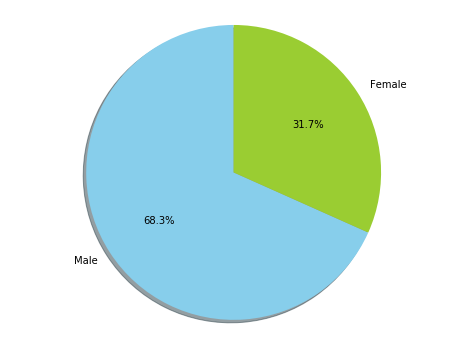

In [8]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### **2. Chest Pain Type**

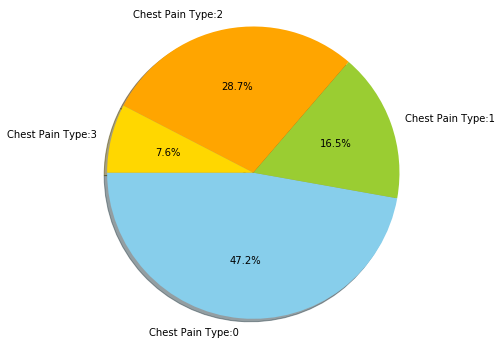

In [9]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **3. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)**

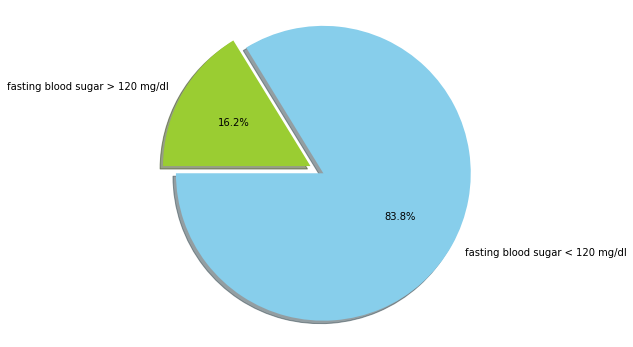

In [10]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **4.exang: exercise induced angina (1 = yes; 0 = no)**

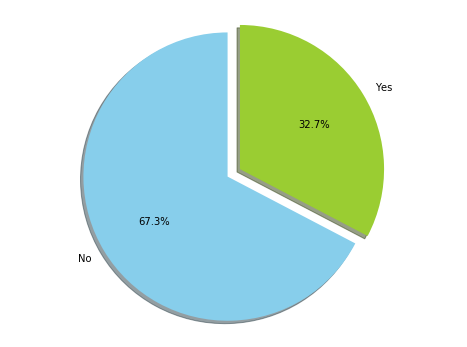

In [11]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### **Exploratory Data Analysis**

In [0]:
sns.set_style('whitegrid')

#### **1. Heatmap**

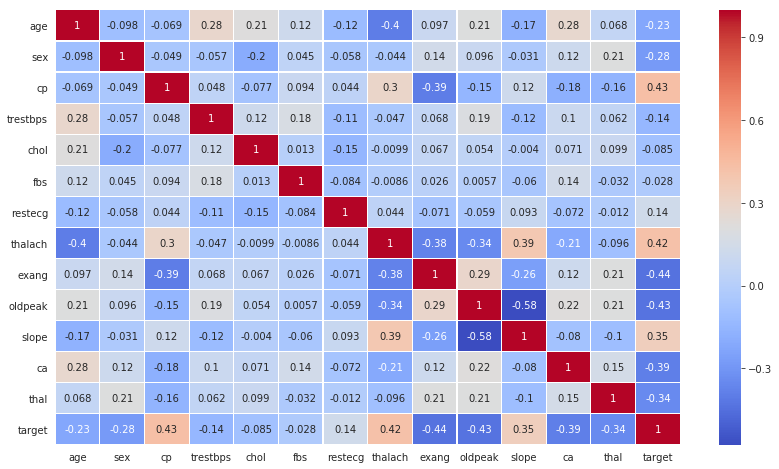

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

#### **Plotting the distribution of various attribures**

#### **1. thalach: maximum heart rate achieved**

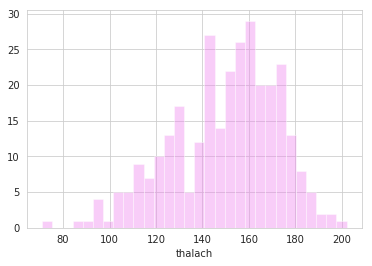

In [14]:
sns.distplot(df['thalach'],kde=False,bins=30,color='violet')

#### **2.chol: serum cholestoral in mg/dl **

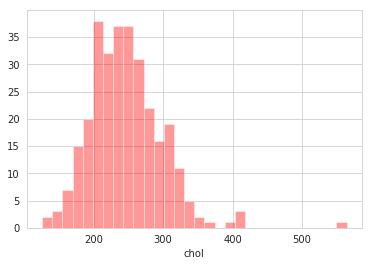

In [15]:
sns.distplot(df['chol'],kde=False,bins=30,color='red')
plt.show()

#### **3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)**

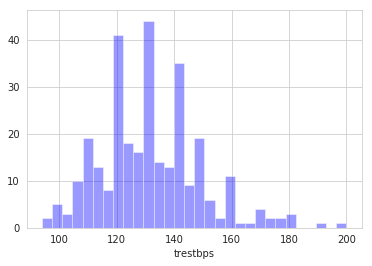

In [16]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

#### **4. Number of people who have heart disease according to age **

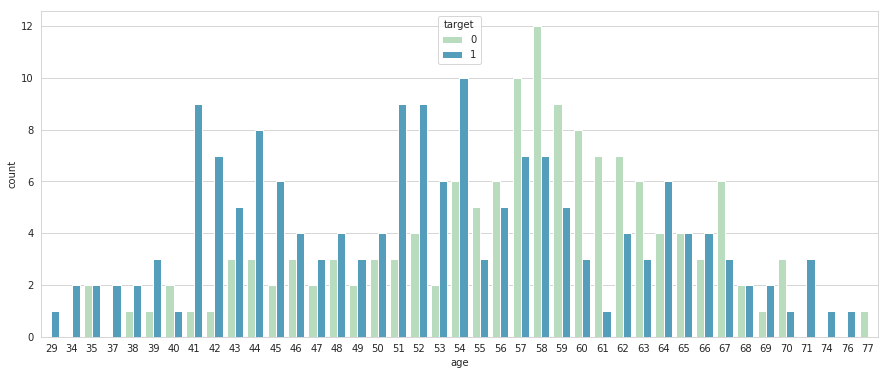

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

#### **5.Scatterplot for thalach vs. chol **

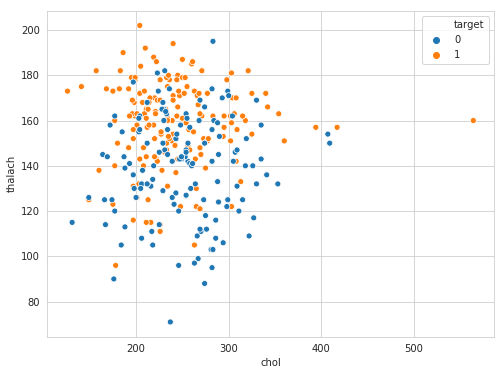

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

#### **6.Scatterplot for thalach vs. trestbps **

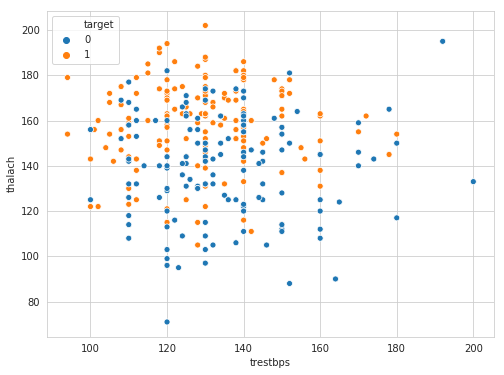

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

### **Making Predictions**

**Splitting the dataset into training and test set**

In [0]:
X= df.drop('target',axis=1)
y=df['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

**Preprocessing - Scaling the features**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## **1. k-Nearest Neighor Algorithm**

**Implementing GridSearchCv to select best parameters and applying k-NN Algorithm**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

In [0]:
model = GridSearchCV(knn,params,cv=10)

In [26]:
model.fit(X_train,y_train)
model.best_params_           #print's parameters best values

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 17}

**Making predictions**

In [0]:
predict = model.predict(X_test)

**Checking accuracy**

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8461538461538461
Using k-NN we get an accuracy score of:  84.615 %


**Confusion Matrix**

In [29]:

cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[32,  9],
       [ 5, 45]])

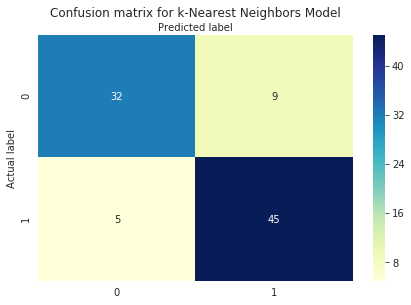

In [30]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Classification report**

In [0]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

   micro avg       0.85      0.85      0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



**Receiver Operating Characterstic(ROC) Curve**

In [0]:
from sklearn.metrics import roc_auc_score,roc_curve

In [0]:
#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]

In [0]:
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

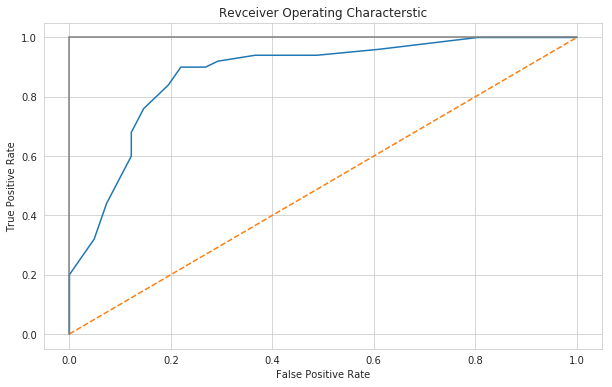

In [36]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8760975609756096

## **2. Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [0]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [40]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

**Making predictions**

In [0]:
predict = log_model.predict(X_test)

**Accuracy Metrics**

In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %


In [43]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

   micro avg       0.82      0.82      0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



**Confusion Matrix**

In [44]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[33,  8],
       [ 8, 42]])

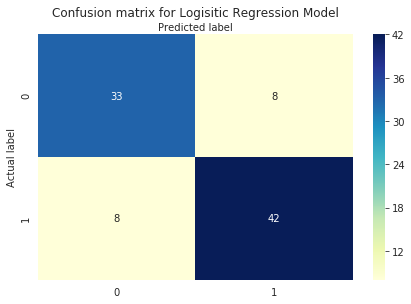

In [45]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Receiver Operating Characterstic(ROC) Curve**

In [0]:




#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]

In [0]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

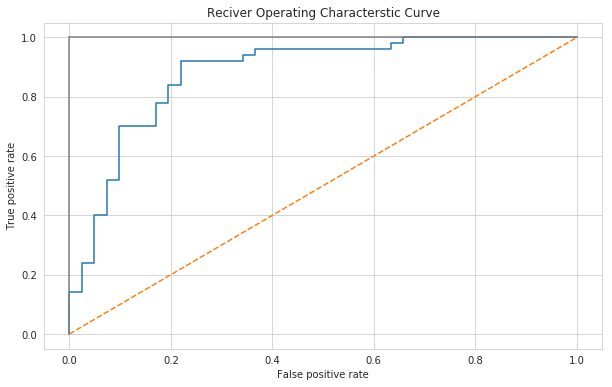

In [48]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [49]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)

0.8804878048780488

** Comparing ROC Curve of k-Nearest Neighbors and Logistic Regression**

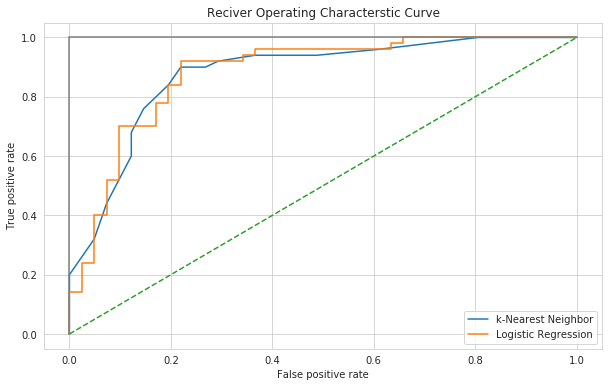

In [50]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()